In [2]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#한글 깨짐 처리
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 모델 불러오기
model=LdaSeqModel.load("DTM_8.model")

In [4]:
#데이터 불러오기
df=pd.read_excel('특허_명사_수정.xlsx',index_col=0)
df

,출원번호,출원일자,발명의 명칭,출원인,요약,year,nouns
0,10-2015-0062820,2015.05.05,압력가압수단에 의해 원터치 방식으로 망체를 창틀프레임에 고정시키는 방법 및 이를 이...,주식회사 에스지텍(대전광역시 중구...),본 발명은 압력가압수단에 의해 편리하게 망체가 결합되는 방범창 및 이를 이용한 망체...,2015,"['압력', '가압', '수단', '편리', '망체', '결합', '방범', '창'..."
1,10-2015-0045530,2015.03.31,터널 화재진압용 차폐장치(ENCLOSURE APPARATUS FOR FIRE SUP...,창전이앤시 주식회사(경기도 용인시 수지구...),"본 발명은, 터널의 환기작동을 행할 수 있어 터널의 유지관리를 효과적으로 행할 수 ...",2015,"['터널', '환기', '작동', '터널', '유지', '관리', '효과', '화재..."
2,10-2015-0003420,2015.01.09,사다리형 부재 용접장치(Apparatus for Welding Ladder type...,(주)마스타에프에이(광주광역시 광산구...),"본 발명은 사다리형 부재 용접장치에 관한 것이다. 이를 위해, 본 발명은 장축부재와...",2015,"['사다리', '용접', '장치', '장축', '단축', '사다리', '형태', '..."
3,10-2014-7020640,2013.01.29,이동가능한 재배치층을 이용하여 재배치된 웨이퍼의 제조방법(METHOD FOR MAK...,"엘3해리스 테크놀러지스, 인크.(미합중국 플로리다 ***** 멜보른 웨스트 나사 블...",본 발명은 복수의 전자 디바이스를 갖는 웨이퍼를 제공하는 단계를 포함하는 재배치된 ...,2015,"['전자', '디바이스', '웨이퍼', '배치', '전자', '디바이스', '제조'..."
4,10-2014-0180930,2014.12.16,도로 절단장치(Pavement cutting apparatus),주식회사 한라기계상사(경기도 광주시...),"본 발명은 도로 절단장치에 관한 것으로, 특히 도로의 절단시 발생하는 분진의 비산을...",2015,"['도로', '절단', '장치', '도로', '절단', '분진', '산', '방지'..."
...,...,...,...,...,...,...,...
886173,10-2020-7021005,2018.02.13,성형면 패스너 및 성형면 패스너의 제조 방법(MOLDED HOOK-AND-LOOP ...,와이케이케이 가부시끼가이샤(일본 도꾜도 지요다꾸 간다 이즈미쪼 *반지),"본 발명의 성형면 패스너는, 기부(11, 81)와, 기부(11, 81)의 상면에 길...",2022,"['성형', '면', '패스', '기부', '기부', '상면', '길', '방향',..."
886174,10-2021-0174947,2021.12.08,방수 투습 기능성 앞치마(MOISTURE-PERMEABLE MOISTURE-PROO...,이성근(경기도 포천시...),"본 발명은 방수 투습 기능성 앞치마에 관한 것으로, 보다 상세하게는 상부 방향으로 ...",2022,"['방수', '투습', '기능', '앞치마', '상부', '방향', '형성', '목..."
886175,10-2020-7019455,2018.12.12,핸들 어셈블리 및 이를 포함하는 스테이플러(HANDLE ASSEMBLY AND ST...,"터치스톤 인터내셔널 메디컬 사이언스 씨오., 엘티디.(중국 지앙수 ****** 쑤저...",본 발명은 핸들 어셈블리 및 이를 포함하는 스테이플러를 제공한다. 상기 핸들 어셈블...,2022,"['핸들', '어셈블리', '스테이플러', '핸들', '어셈블리', '핸들', '핸..."
886176,10-2021-0167127,2021.11.29,자동 채수기(Automatic water sampler),이정원(경상남도 통영시...)|허세민(경상남도 김해시...)|윤준호(경상남도 창원시...,"본 발명은 자동 채수기에 관한 것으로, 내부에 유체를 저장하는 유체 저장부가 형성되...",2022,"['자동', '채수기', '내부', '유체', '저장', '유체', '장부', '형..."


In [5]:
#연도별 문서 개수
df['year'].value_counts()

2021    148352
2020    137737
2022    134999
2019    121522
2018    102851
2017     94982
2016     79088
2015     66647
Name: year, dtype: int64

## 2015년 주제별 문서 개수

In [6]:
#문서 개수 딕셔너리 생성
dic_2015 = {'Topic0':0,'Topic1':0,'Topic2':0,'Topic3':0,'Topic4':0,'Topic5':0,'Topic6':0,'Topic7':0}

In [7]:
#2015년 문서 인덱스 번호 찾기
year_index=np.where(df['year']==2015)
year_index[0]

array([    0,     1,     2, ..., 66644, 66645, 66646], dtype=int64)

In [8]:
for i in year_index[0]:
    index=np.where(model.doc_topics(i)==max(model.doc_topics(i)))
    dic_2015['Topic'+str(index[0][0])]+=1

In [9]:
dic_2015

{'Topic0': 12853,
 'Topic1': 6410,
 'Topic2': 5963,
 'Topic3': 12958,
 'Topic4': 7750,
 'Topic5': 4777,
 'Topic6': 8573,
 'Topic7': 7363}

In [10]:
print(f'특허 문서 총 개수: {len(year_index[0])}')
print(f'토픽별 문서 총합: {sum(dic_2015.values())}')

특허 문서 총 개수: 66647
토픽별 문서 총합: 66647


## 2016년 주제별 문서 개수

In [11]:
#문서 개수 딕셔너리 생성
dic_2016 = {'Topic0':0,'Topic1':0,'Topic2':0,'Topic3':0,'Topic4':0,'Topic5':0,'Topic6':0,'Topic7':0}

In [12]:
#2016년 문서 인덱스 번호 찾기
year_index=np.where(df['year']==2016)
year_index[0]

array([ 66647,  66648,  66649, ..., 145732, 145733, 145734], dtype=int64)

In [13]:
for i in year_index[0]:
    index=np.where(model.doc_topics(i)==max(model.doc_topics(i)))
    dic_2016['Topic'+str(index[0][0])]+=1

In [14]:
dic_2016

{'Topic0': 15342,
 'Topic1': 8292,
 'Topic2': 6828,
 'Topic3': 14898,
 'Topic4': 9103,
 'Topic5': 5518,
 'Topic6': 10299,
 'Topic7': 8808}

In [15]:
print(f'특허 문서 총 개수: {len(year_index[0])}')
print(f'토픽별 문서 총합: {sum(dic_2016.values())}')

특허 문서 총 개수: 79088
토픽별 문서 총합: 79088


## 2017년 주제별 문서 개수

In [16]:
#문서 개수 딕셔너리 생성
dic_2017 = {'Topic0':0,'Topic1':0,'Topic2':0,'Topic3':0,'Topic4':0,'Topic5':0,'Topic6':0,'Topic7':0}

In [17]:
#2017년 문서 인덱스 번호 찾기
year_index=np.where(df['year']==2017)
year_index[0]

array([145735, 145736, 145737, ..., 240714, 240715, 240716], dtype=int64)

In [18]:
for i in year_index[0]:
    index=np.where(model.doc_topics(i)==max(model.doc_topics(i)))
    dic_2017['Topic'+str(index[0][0])]+=1

In [19]:
dic_2017

{'Topic0': 20415,
 'Topic1': 10025,
 'Topic2': 8065,
 'Topic3': 17747,
 'Topic4': 10681,
 'Topic5': 6620,
 'Topic6': 11521,
 'Topic7': 9908}

In [20]:
print(f'특허 문서 총 개수: {len(year_index[0])}')
print(f'토픽별 문서 총합: {sum(dic_2017.values())}')

특허 문서 총 개수: 94982
토픽별 문서 총합: 94982


## 2018년 주제별 문서 개수

In [21]:
#문서 개수 딕셔너리 생성
dic_2018 = {'Topic0':0,'Topic1':0,'Topic2':0,'Topic3':0,'Topic4':0,'Topic5':0,'Topic6':0,'Topic7':0}

In [22]:
#2018년 문서 인덱스 번호 찾기
year_index=np.where(df['year']==2018)
year_index[0]

array([240717, 240718, 240719, ..., 343565, 343566, 343567], dtype=int64)

In [23]:
for i in year_index[0]:
    index=np.where(model.doc_topics(i)==max(model.doc_topics(i)))
    dic_2018['Topic'+str(index[0][0])]+=1

In [24]:
dic_2018

{'Topic0': 21394,
 'Topic1': 10768,
 'Topic2': 8761,
 'Topic3': 19887,
 'Topic4': 12143,
 'Topic5': 7068,
 'Topic6': 11755,
 'Topic7': 11075}

In [25]:
print(f'특허 문서 총 개수: {len(year_index[0])}')
print(f'토픽별 문서 총합: {sum(dic_2018.values())}')

특허 문서 총 개수: 102851
토픽별 문서 총합: 102851


## 2019년 주제별 문서 개수

In [26]:
#문서 개수 딕셔너리 생성
dic_2019 = {'Topic0':0,'Topic1':0,'Topic2':0,'Topic3':0,'Topic4':0,'Topic5':0,'Topic6':0,'Topic7':0}

In [27]:
#2019년 문서 인덱스 번호 찾기
year_index=np.where(df['year']==2019)
year_index[0]

array([343568, 343569, 343570, ..., 465087, 465088, 465089], dtype=int64)

In [28]:
for i in year_index[0]:
    index=np.where(model.doc_topics(i)==max(model.doc_topics(i)))
    dic_2019['Topic'+str(index[0][0])]+=1

In [29]:
dic_2019

{'Topic0': 23290,
 'Topic1': 13280,
 'Topic2': 10248,
 'Topic3': 22790,
 'Topic4': 14869,
 'Topic5': 9105,
 'Topic6': 14676,
 'Topic7': 13264}

In [30]:
print(f'특허 문서 총 개수: {len(year_index[0])}')
print(f'토픽별 문서 총합: {sum(dic_2019.values())}')

특허 문서 총 개수: 121522
토픽별 문서 총합: 121522


## 2020년 주제별 문서 개수

In [31]:
#문서 개수 딕셔너리 생성
dic_2020 = {'Topic0':0,'Topic1':0,'Topic2':0,'Topic3':0,'Topic4':0,'Topic5':0,'Topic6':0,'Topic7':0}

In [32]:
#2020년 문서 인덱스 번호 찾기
year_index=np.where(df['year']==2020)
year_index[0]

array([465090, 465091, 465092, ..., 602824, 602825, 602826], dtype=int64)

In [33]:
for i in year_index[0]:
    index=np.where(model.doc_topics(i)==max(model.doc_topics(i)))
    dic_2020['Topic'+str(index[0][0])]+=1

In [34]:
dic_2020

{'Topic0': 25903,
 'Topic1': 15924,
 'Topic2': 11109,
 'Topic3': 26064,
 'Topic4': 16436,
 'Topic5': 10255,
 'Topic6': 17497,
 'Topic7': 14549}

In [35]:
print(f'특허 문서 총 개수: {len(year_index[0])}')
print(f'토픽별 문서 총합: {sum(dic_2020.values())}')

특허 문서 총 개수: 137737
토픽별 문서 총합: 137737


## 2021년 주제별 문서 개수

In [36]:
#문서 개수 딕셔너리 생성
dic_2021 = {'Topic0':0,'Topic1':0,'Topic2':0,'Topic3':0,'Topic4':0,'Topic5':0,'Topic6':0,'Topic7':0}

In [37]:
#2021년 문서 인덱스 번호 찾기
year_index=np.where(df['year']==2021)
year_index[0]

array([602827, 602828, 602829, ..., 751176, 751177, 751178], dtype=int64)

In [38]:
for i in year_index[0]:
    index=np.where(model.doc_topics(i)==max(model.doc_topics(i)))
    dic_2021['Topic'+str(index[0][0])]+=1

In [39]:
dic_2021

{'Topic0': 28000,
 'Topic1': 18366,
 'Topic2': 11164,
 'Topic3': 26296,
 'Topic4': 17600,
 'Topic5': 11238,
 'Topic6': 20093,
 'Topic7': 15595}

In [40]:
print(f'특허 문서 총 개수: {len(year_index[0])}')
print(f'토픽별 문서 총합: {sum(dic_2021.values())}')

특허 문서 총 개수: 148352
토픽별 문서 총합: 148352


## 2022년 주제별 문서 개수

In [41]:
#문서 개수 딕셔너리 생성
dic_2022 = {'Topic0':0,'Topic1':0,'Topic2':0,'Topic3':0,'Topic4':0,'Topic5':0,'Topic6':0,'Topic7':0}

In [42]:
#2022년 문서 인덱스 번호 찾기
year_index=np.where(df['year']==2022)
year_index[0]

array([751179, 751180, 751181, ..., 886175, 886176, 886177], dtype=int64)

In [43]:
for i in year_index[0]:
    index=np.where(model.doc_topics(i)==max(model.doc_topics(i)))
    dic_2022['Topic'+str(index[0][0])]+=1

In [44]:
dic_2022

{'Topic0': 24381,
 'Topic1': 17136,
 'Topic2': 10422,
 'Topic3': 22767,
 'Topic4': 16902,
 'Topic5': 10710,
 'Topic6': 18877,
 'Topic7': 13804}

In [45]:
print(f'특허 문서 총 개수: {len(year_index[0])}')
print(f'토픽별 문서 총합: {sum(dic_2022.values())}')

특허 문서 총 개수: 134999
토픽별 문서 총합: 134999


## 주제별 문서 통합 개수

In [46]:
#통합 문서 개수 딕셔너리 생성
dic_sum={'Topic0':0,'Topic1':0,'Topic2':0,'Topic3':0,'Topic4':0,'Topic5':0,'Topic6':0,'Topic7':0}

In [49]:
#연도별 문서수 통합
for i in range(0,8):
    dic_sum['Topic'+str(i)]+=dic_2015['Topic'+str(i)]
    dic_sum['Topic'+str(i)]+=dic_2016['Topic'+str(i)]
    dic_sum['Topic'+str(i)]+=dic_2017['Topic'+str(i)]
    dic_sum['Topic'+str(i)]+=dic_2018['Topic'+str(i)]
    dic_sum['Topic'+str(i)]+=dic_2019['Topic'+str(i)]
    dic_sum['Topic'+str(i)]+=dic_2020['Topic'+str(i)]
    dic_sum['Topic'+str(i)]+=dic_2021['Topic'+str(i)]
    dic_sum['Topic'+str(i)]+=dic_2022['Topic'+str(i)]

In [50]:
dic_sum

{'Topic0': 171578,
 'Topic1': 100201,
 'Topic2': 72560,
 'Topic3': 163407,
 'Topic4': 105484,
 'Topic5': 65291,
 'Topic6': 113291,
 'Topic7': 94366}

In [53]:
print(f'특허 문서 총 개수: {len(df["year"])}')
print(f'토픽별 문서 총합: {sum(dic_sum.values())}')

특허 문서 총 개수: 886178
토픽별 문서 총합: 886178


## 데이터 프레임

### 연도별 문서 수 데이터 프레임

In [158]:
#데이터 프레임 생성 후 2015년 데이터 추가
df_cnt=pd.DataFrame.from_dict(dic_2015,orient='index',columns=[2015])
df_cnt

,2015
Topic0,12853
Topic1,6410
Topic2,5963
Topic3,12958
Topic4,7750
Topic5,4777
Topic6,8573
Topic7,7363


In [159]:
#연도별 문서수 행 추가
df_cnt['2016']=dic_2016.values()
df_cnt['2017']=dic_2017.values()
df_cnt['2018']=dic_2018.values()
df_cnt['2019']=dic_2019.values()
df_cnt['2020']=dic_2020.values()
df_cnt['2021']=dic_2021.values()
df_cnt['2022']=dic_2022.values()

In [160]:
#행/열 변환 후 연도 컬럼 추가
df_cnt=df_cnt.transpose()
df_cnt.index.name='year'
df_cnt.reset_index(inplace=True)

In [161]:
#연도별 문서 총 개수 컬럼 생성
total=list(df['year'].value_counts(sort=False))
df_cnt['sum']=total

In [162]:
df_cnt

,year,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,sum
0,2015,12853,6410,5963,12958,7750,4777,8573,7363,66647
1,2016,15342,8292,6828,14898,9103,5518,10299,8808,79088
2,2017,20415,10025,8065,17747,10681,6620,11521,9908,94982
3,2018,21394,10768,8761,19887,12143,7068,11755,11075,102851
4,2019,23290,13280,10248,22790,14869,9105,14676,13264,121522
5,2020,25903,15924,11109,26064,16436,10255,17497,14549,137737
6,2021,28000,18366,11164,26296,17600,11238,20093,15595,148352
7,2022,24381,17136,10422,22767,16902,10710,18877,13804,134999


In [150]:
#파일 저장
df_cnt.to_excel('특허문서수.xlsx')

### 연도별 특허 문서 비율 데이터 프레임

In [202]:
#특허 문서 비율 계산
topic_list=['Topic0','Topic1','Topic2','Topic3','Topic4','Topic5','Topic6','Topic7']
df_rate=pd.DataFrame()
for topic in topic_list:
    df_rate[topic]=df_cnt[topic]/df_cnt['sum']
df_rate

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7
0,0.192852,0.096178,0.089471,0.194427,0.116284,0.071676,0.128633,0.110478
1,0.193986,0.104845,0.086334,0.188372,0.115100,0.069770,0.130222,0.111370
2,0.214935,0.105546,0.084911,0.186846,0.112453,0.069697,0.121297,0.104315
3,0.208010,0.104695,0.085181,0.193357,0.118064,0.068721,0.114292,0.107680
4,0.191653,0.109281,0.084330,0.187538,0.122356,0.074925,0.120768,0.109149
5,0.188061,0.115612,0.080654,0.189230,0.119329,0.074453,0.127032,0.105629
6,0.188740,0.123800,0.075253,0.177254,0.118637,0.075752,0.135441,0.105122
7,0.180601,0.126934,0.077201,0.168646,0.125201,0.079334,0.139831,0.102253


In [203]:
#연도 컬럼 추가
df_rate.index=[2015,2016,2017,2018,2019,2020,2021,2022]
df_rate.index.name='year'
df_rate.reset_index(inplace=True)

In [204]:
#비율 총합 계산
total_rate=[]
for i in range(8):
    rate_sum=0
    for rate in list(df_rate.iloc[i,1:]):
        rate_sum+=rate
    total_rate.append(rate_sum)
total_rate

[0.9999999999999999,
 0.9999999999999999,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 0.9999999999999999]

In [205]:
#비율 총합 행 추가
df_rate['total_rate']=total_rate
df_rate

,year,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,total_rate
0,2015,0.192852,0.096178,0.089471,0.194427,0.116284,0.071676,0.128633,0.110478,1.0
1,2016,0.193986,0.104845,0.086334,0.188372,0.115100,0.069770,0.130222,0.111370,1.0
2,2017,0.214935,0.105546,0.084911,0.186846,0.112453,0.069697,0.121297,0.104315,1.0
3,2018,0.208010,0.104695,0.085181,0.193357,0.118064,0.068721,0.114292,0.107680,1.0
4,2019,0.191653,0.109281,0.084330,0.187538,0.122356,0.074925,0.120768,0.109149,1.0
5,2020,0.188061,0.115612,0.080654,0.189230,0.119329,0.074453,0.127032,0.105629,1.0
6,2021,0.188740,0.123800,0.075253,0.177254,0.118637,0.075752,0.135441,0.105122,1.0
7,2022,0.180601,0.126934,0.077201,0.168646,0.125201,0.079334,0.139831,0.102253,1.0


In [206]:
#파일 저장
df_rate.to_excel('특허문서비율.xlsx')

## 시각화

In [209]:
#빈도수 시각화 함수
def count_graph(topic):
    color_list=['C0','C1','C2','C3','C4','C5','C6','C7']
    plt.figure(figsize=(10,5))
    for i in range(len(topic)):
        sns.lineplot(data=df_cnt,x='year',y=topic[i],color=color_list[i])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.legend(topic,loc='center left', bbox_to_anchor=(1, 0.7),fontsize=14)
    plt.show()

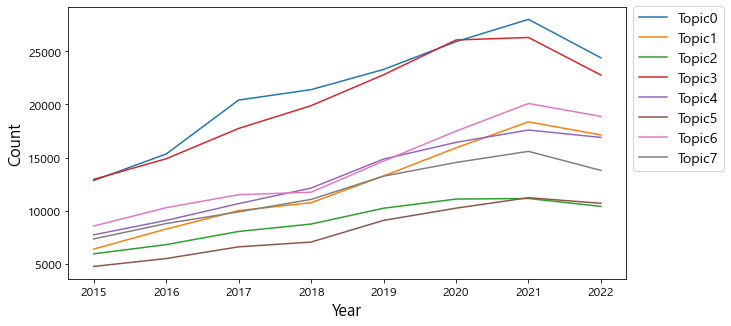

In [210]:
topic_list=['Topic0','Topic1','Topic2','Topic3','Topic4','Topic5','Topic6','Topic7']
count_graph(topic_list)

In [211]:
#구성 비율 시각화 함수
def rate_graph(topic):
    color_list=['C0','C1','C2','C3','C4','C5','C6','C7']
    plt.figure(figsize=(10,5))
    for i in range(len(topic)):
        sns.lineplot(data=df_rate,x='year',y=topic[i],color=color_list[i])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Rate', fontsize=16)
    plt.legend(topic,loc='center left', bbox_to_anchor=(1, 0.7),fontsize=14)
    plt.show()

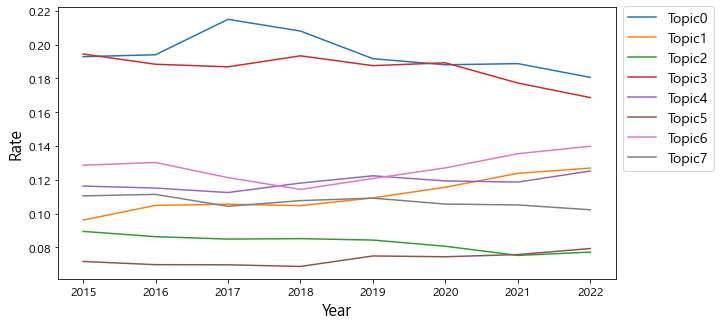

In [212]:
rate_graph(topic_list)